<a href="https://colab.research.google.com/github/ferit-osirv/lab-3-23-24-Samke004/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Image Compression and Frequency Analysis

**This command must be run before starting to do each lab.**

In [1]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab3 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 43 (delta 2), reused 20 (delta 1), pack-reused 17 (from 1)
Receiving objects: 100% (43/43), 10.11 MiB | 15.21 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Color Quantization

Quantization in the context of image processing is a technique that reduces the number of distinct pixel values used to represent an image. It achieves this by mapping a range of values to a single quantum value, effectively reducing the image's color depth or the number of bits required per pixel. This process is a fundamental aspect of lossy image compression, where the goal is to decrease the size of the image file at the cost of a reduction in image quality.

![](https://upload.wikimedia.org/wikipedia/commons/e/e3/Dithering_example_undithered.png)

![](https://upload.wikimedia.org/wikipedia/commons/4/48/Dithering_example_undithered_16color_palette.png)

The above image was quantized to 16 colors using a color palette. The quantized image on the bottom has a reduced color depth compared to the original image on the top.

**In the context of image compression**, color quantization is used in the GIF image format, while YCbCr chroma quantization is used in JPEG compression. The YCbCr color space separates the luminance (Y) from the chrominance (Cb and Cr) components, allowing for more efficient compression by quantizing the chroma channels more aggressively than the luminance channel.

![width=20%](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Barns_grand_tetons_YCbCr_separation.jpg/241px-Barns_grand_tetons_YCbCr_separation.jpg)

In the above image, you can see the original image and then the Y, Cr and Cb channels separately. The Y channel contains the luminance information, while the Cr and Cb channels contain the chrominance information. Notice how the Y channel contains almost all information in the image: You can tell the mountains, the barn, and the trees just by looking at the Y channel.

> ### Assignment 1: Color and Chroma Quantization
>
>1. **RGB Color Quantization:**
>   - Load an RGB image, where each channel is initially 8 bits.
>   - Quantize to 7 bits per channel by mapping the 256 original levels to 128.
>   - Calculate the compression ratio (how many bits are needed to represent the original image vs. the quantized image).
>
>2. **YCbCr Chroma Quantization:**
>   - Convert the RGB image to YCbCr using `cv2.cvtColor()`. Y represents luminance; Cb and Cr represent chrominance.
>   - Perform quantization on the Cb and Cr channels to reduce color detail. I.e. reduce chroma resolution by a factor of 2 so that there are 128 unique levels.
>   - Compute the compression ratio and compare with RGB quantization.
>
>3. **Analysis:**
>   - Display the original, color quantized, and chroma quantized images for visual comparison.
>   - Evaluate the compression ratios and discuss the balance between compression efficiency and image fidelity.
>   - What is the difference when quantizing color channels vs. chroma channels? Why might chroma quantization be more efficient?

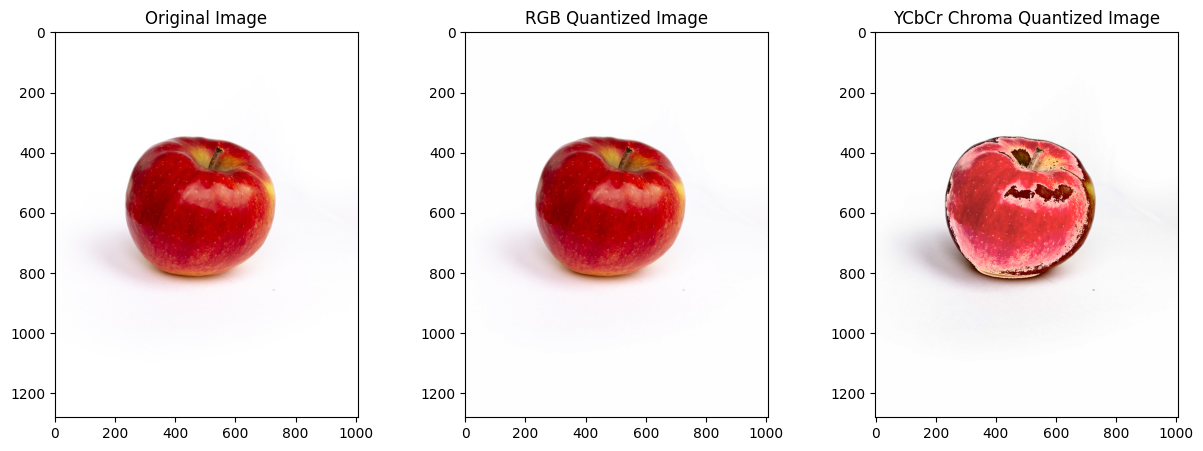

RGB Quantization Compression Ratio: 1.14
YCbCr Chroma Quantization Compression Ratio: 1.09


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/apple.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


quantized_rgb = (rgb_image // 2).astype('uint8')

original_bits_per_pixel = 8 * 3
quantized_bits_per_pixel_rgb = 7 * 3
compression_ratio_rgb = original_bits_per_pixel / quantized_bits_per_pixel_rgb

ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
y, cb, cr = cv2.split(ycbcr_image)

quantized_cb = (cb // 2).astype('uint8')
quantized_cr = (cr // 2).astype('uint8')

quantized_ycbcr = cv2.merge([y, quantized_cb, quantized_cr])

quantized_bits_per_pixel_ycbcr = 8 + 7 + 7
compression_ratio_ycbcr = original_bits_per_pixel / quantized_bits_per_pixel_ycbcr

quantized_rgb_solution=(quantized_rgb*2).astype('uint8')
quantized_rgb_bgr = cv2.cvtColor(quantized_rgb_solution, cv2.COLOR_RGB2BGR)

quantized_ycbcr_bgr = cv2.cvtColor((quantized_ycbcr*2), cv2.COLOR_YCrCb2BGR)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(quantized_rgb_bgr, cv2.COLOR_BGR2RGB))
plt.title("RGB Quantized Image")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(quantized_ycbcr_bgr, cv2.COLOR_BGR2RGB))
plt.title("YCbCr Chroma Quantized Image")
plt.show()

print(f"RGB Quantization Compression Ratio: {compression_ratio_rgb:.2f}")
print(f"YCbCr Chroma Quantization Compression Ratio: {compression_ratio_ycbcr:.2f}")


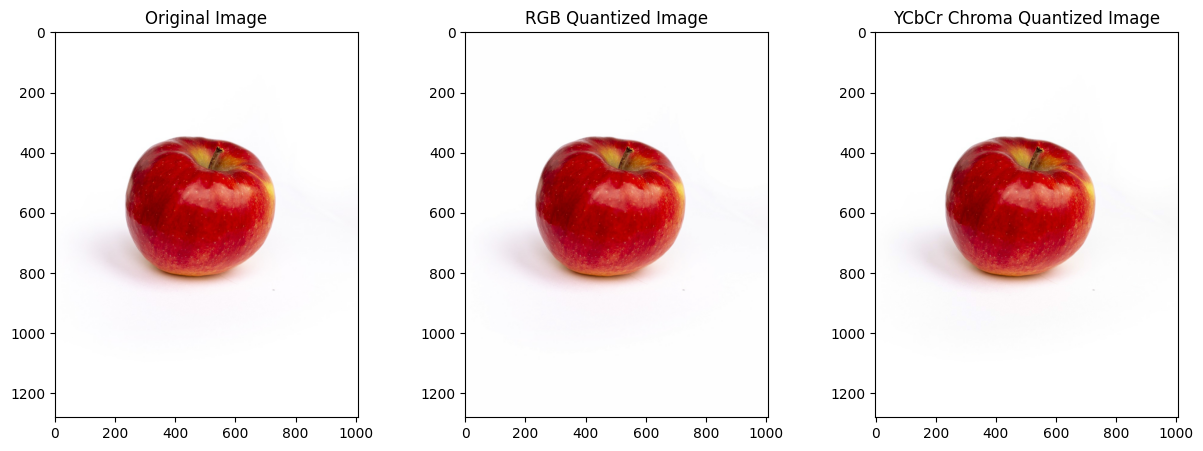

RGB Quantization Compression Ratio: 1.14
YCbCr Chroma Quantization Compression Ratio: 1.09


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/apple.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


quantized_rgb = (rgb_image // 2).astype('uint8')

original_bits_per_pixel = 8 * 3
quantized_bits_per_pixel_rgb = 7 * 3
compression_ratio_rgb = original_bits_per_pixel / quantized_bits_per_pixel_rgb

ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
y, cb, cr = cv2.split(ycbcr_image)

quantized_cb = (cb // 2).astype('uint8')*2
quantized_cr = (cr // 2).astype('uint8')*2

quantized_ycbcr = cv2.merge([y, quantized_cb, quantized_cr])

quantized_bits_per_pixel_ycbcr = 8 + 7 + 7
compression_ratio_ycbcr = original_bits_per_pixel / quantized_bits_per_pixel_ycbcr

quantized_rgb_solution=(quantized_rgb*2).astype('uint8')
quantized_rgb_bgr = cv2.cvtColor(quantized_rgb_solution, cv2.COLOR_RGB2BGR)

quantized_ycbcr_bgr = cv2.cvtColor(quantized_ycbcr, cv2.COLOR_YCrCb2BGR)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(quantized_rgb_bgr, cv2.COLOR_BGR2RGB))
plt.title("RGB Quantized Image")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(quantized_ycbcr_bgr, cv2.COLOR_BGR2RGB))
plt.title("YCbCr Chroma Quantized Image")
plt.show()

print(f"RGB Quantization Compression Ratio: {compression_ratio_rgb:.2f}")
print(f"YCbCr Chroma Quantization Compression Ratio: {compression_ratio_ycbcr:.2f}")


## Fourier Transform

Consider the following function:

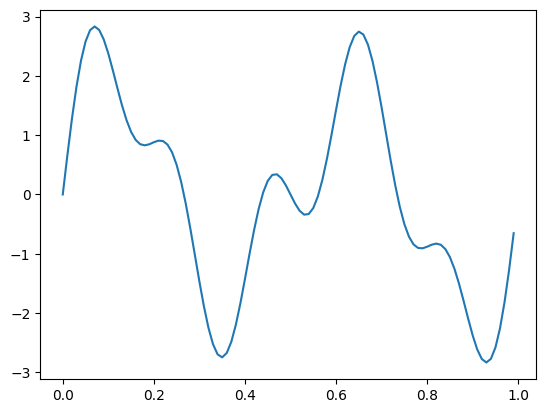

In [7]:
t = np.arange(0, 1, 0.01)
x1 = 1 * np.sin(2 * np.pi * 5 * t)
x2 = 2 * np.sin(2 * np.pi * 2 * t)
x3 = 0.5 * np.sin(2 * np.pi * 3 * t)
x = x1 + x2 + x3
plt.plot(t, x)

> **Question**: x is a sum of three sine signals. What are the amplitudes and frequencies (in Hz) of each of those signals?

In [ ]:
Write your answer here.


Let's check your answer using the **Fourier transform** (fft).

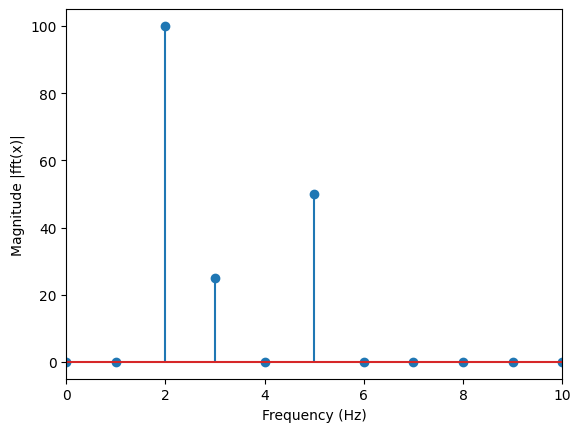

In [12]:
fft_result = np.fft.fft(x)
plt.stem(np.abs(fft_result))
plt.xlim(0, 10)
plt.ylabel('Magnitude |fft(x)|')
plt.xlabel('Frequency (Hz)');

As you can see, the Fourier Transform decomposes a signal into a sum of sinusoids and gives us the frequencies, amplitudes, and phases of each of the components. In fact, we can see how much each of the frequencies contributes to `x` in order, 2 being the largest, then 5 and finally 3.

We can see those magnitutes here, arranged in order of frequencies from 0 to 9:

In [13]:
print(np.round(np.abs(fft_result), 2)[:10])

[  0.   0. 100.  25.   0.  50.   0.   0.   0.   0.]


We saw that f = 3 has the lowest impact (magnitude) on the signal. What happens if we remove it?

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


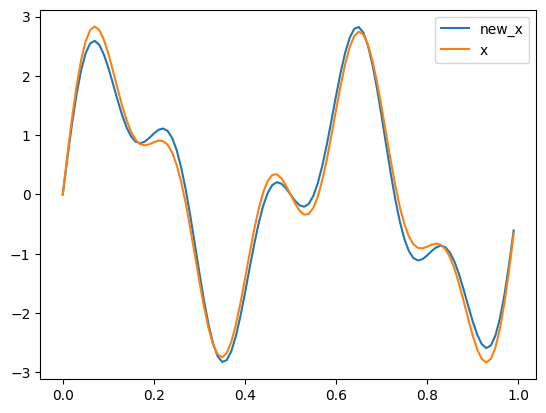

In [14]:
new_fft = fft_result.copy()

# remove f = 3 from the signal
new_fft[3] = 0

# use inverse fft to get the new signal with f = 3 removed
new_x = np.fft.ifft(new_fft)
plt.plot(t, new_x)
plt.plot(t, x)
plt.legend(['new_x', 'x']);

Because we removed the least important frequency, the signal is almost the same! That is the gist of image compression.

**Image compression works by removing data that with the smallest contribution to the image. The Fourier Transform lets us decompose any function (including images) into a list of sine waves and gives us the contribution of each sine wave to the total image.**

Thus, we can use the Fourier transform to compress images.

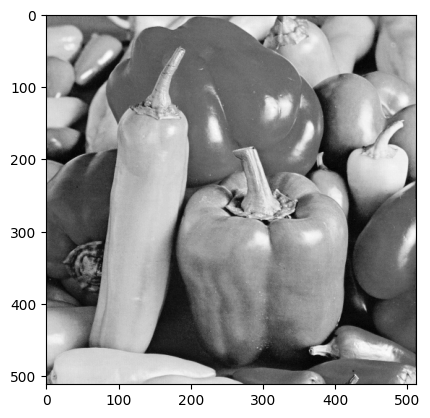

In [15]:
img = cv.imread('images/peppers.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray');

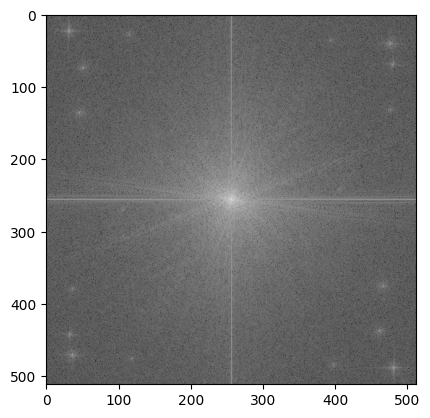

In [16]:
img_ft = np.fft.fft2(img)
img_ft_shifted = np.fft.fftshift(img_ft)

# visualize the magnitude of the fft
plt.imshow(np.log(np.abs(img_ft_shifted) + 1), cmap='gray');

The FT of an image is much more complex, but the same logic applies. Each number in `image_ft_shifted` is a complex number that represents the contribution of a sine wave to the image. The magnitude of each number is the amplitude of the sine wave, and the angle is the phase.

The sine waves are ordered by frequency, with the lowest frequency in the center and the highest frequency at the edges. Remember that high frequencies correspond to rapid changes in the image, while low frequencies correspond to slow changes.

## Image Compression With the Fourier Transform

Here is a quick overview of how image compression works using the Fourier transform:

1. Apply the Fourier Transform to convert the image from the spatial domain to the frequency domain.
2. Perform frequency-domain filtering by removing or quantizing less significant high-frequency components.
3. Convert the image back to the spatial domain using the inverse Fourier Transform, resulting in a compressed image.
4. Adjust the level of frequency reduction to balance the compression rate with the desired image quality.

In signal processing, a low-pass filter retains low-frequency components while attenuating high-frequency components. This filtering operation is used in image compression to reduce the amount of data needed to represent an image while maintaining its essential features. On the other hand, a high-pass filter emphasizes high-frequency components, and it can be used to enhance edges and textures in an image.

> ### Assignment 2: Low and High-Pass Filters
>
> #### Task 1: Low-Pass Filtering
>   1. Create a circular mask with high values (1) in the center and low values (0) towards the edges. The size of the central high-value area determines the cutoff frequency.
>   2. Multiply the Fourier-transformed image by this mask to apply the low-pass filter.
>   3. Perform an inverse Fourier Transform to convert back to the spatial domain.
>
> #### Task 2: High-Pass Filtering
>   1. Construct a mask that is the inverse of the low-pass filter: low values (0) in the center transitioning to high values (1) at the edges.
>   2. Apply this mask to the Fourier-transformed image to implement the high-pass filter.
>   3. Use the inverse Fourier Transform to return to the spatial domain.
>
> **Note:** Remember that `fftshift` is used to center the low frequencies in the Fourier-transformed image. You will need to use `ifftshift` to undo this operation before applying the inverse Fourier Transform.

[[255.21121307 255.24446736 255.26192022 ... 255.02518576 255.10009467
  255.16270316]
 [255.15327929 255.17455878 255.18314058 ... 255.01564325 255.07309201
  255.11930257]
 [255.09385178 255.101848   255.10078209 ... 255.01111953 255.04858934
  255.07619987]
 ...
 [255.35692978 255.41476578 255.45133277 ... 255.07778122 255.18538054
  255.27958607]
 [255.31504749 255.36686087 255.39854075 ... 255.05725644 255.15759097
  255.24453732]
 [255.26579838 255.30933683 255.33457648 ... 255.03933108 255.12867134
  255.20498962]]


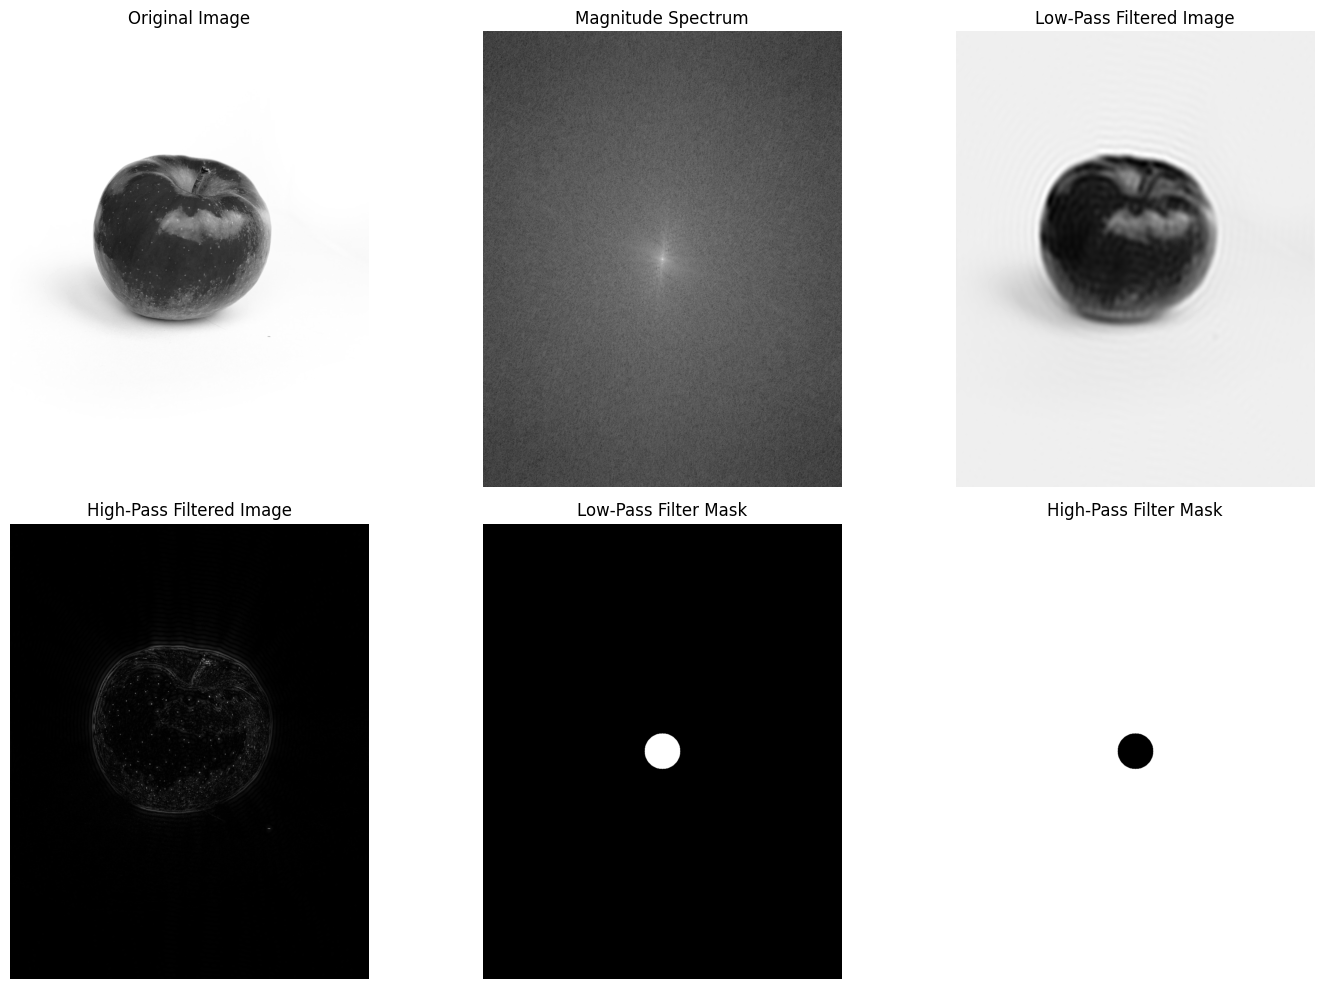

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/apple.jpg', cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift) + 1)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

radius = 50
low_pass_mask = np.zeros((rows, cols), dtype=np.uint8)
cv2.circle(low_pass_mask, (ccol, crow), radius, 1, thickness=-1)

low_pass_filtered = fshift * low_pass_mask

low_pass_ishift = np.fft.ifftshift(low_pass_filtered)
low_pass_image = np.fft.ifft2(low_pass_ishift)
low_pass_image = np.abs(low_pass_image)

high_pass_mask = 1 - low_pass_mask

high_pass_filtered = fshift * high_pass_mask

high_pass_ishift = np.fft.ifftshift(high_pass_filtered)
high_pass_image = np.fft.ifft2(high_pass_ishift)
high_pass_image = np.abs(high_pass_image)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
print(low_pass_image)
plt.subplot(2, 3, 3)
plt.imshow(low_pass_image, cmap='gray')
plt.title("Low-Pass Filtered Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(high_pass_image, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(low_pass_mask, cmap='gray')
plt.title("Low-Pass Filter Mask")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(high_pass_mask, cmap='gray')
plt.title("High-Pass Filter Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


> ### Assignment 3: Image Compression With FT
>
> #### Task 1: Identifying and Retaining Top N Frequencies
>
>    - Convert a grayscale image to the frequency domain using `numpy.fft.fft2()`.
>    - From the magnitude spectrum, identify the top $N$ frequencies with the highest magnitudes. Use `numpy.argsort()` to rank frequencies and select the top $N$. You can use $N = 10^4$ as a good starting point.
>    - Create a mask that retains only these $N$ frequencies, setting all other frequencies to zero. Apply this mask to the Fourier Transform of the image.
>
> #### Task 2: Image Reconstruction and Compression Evaluation
>    - Inverse-transform the modified frequency representation back to the spatial domain using `numpy.fft.ifft2()`.
>    - Compare the reconstructed image with the original to evaluate the effects of retaining only the top $N$ frequencies.
>    - Discuss the compression achieved and its impact on image quality, particularly noting which features are preserved or lost.

Compression Ratio: 128.90


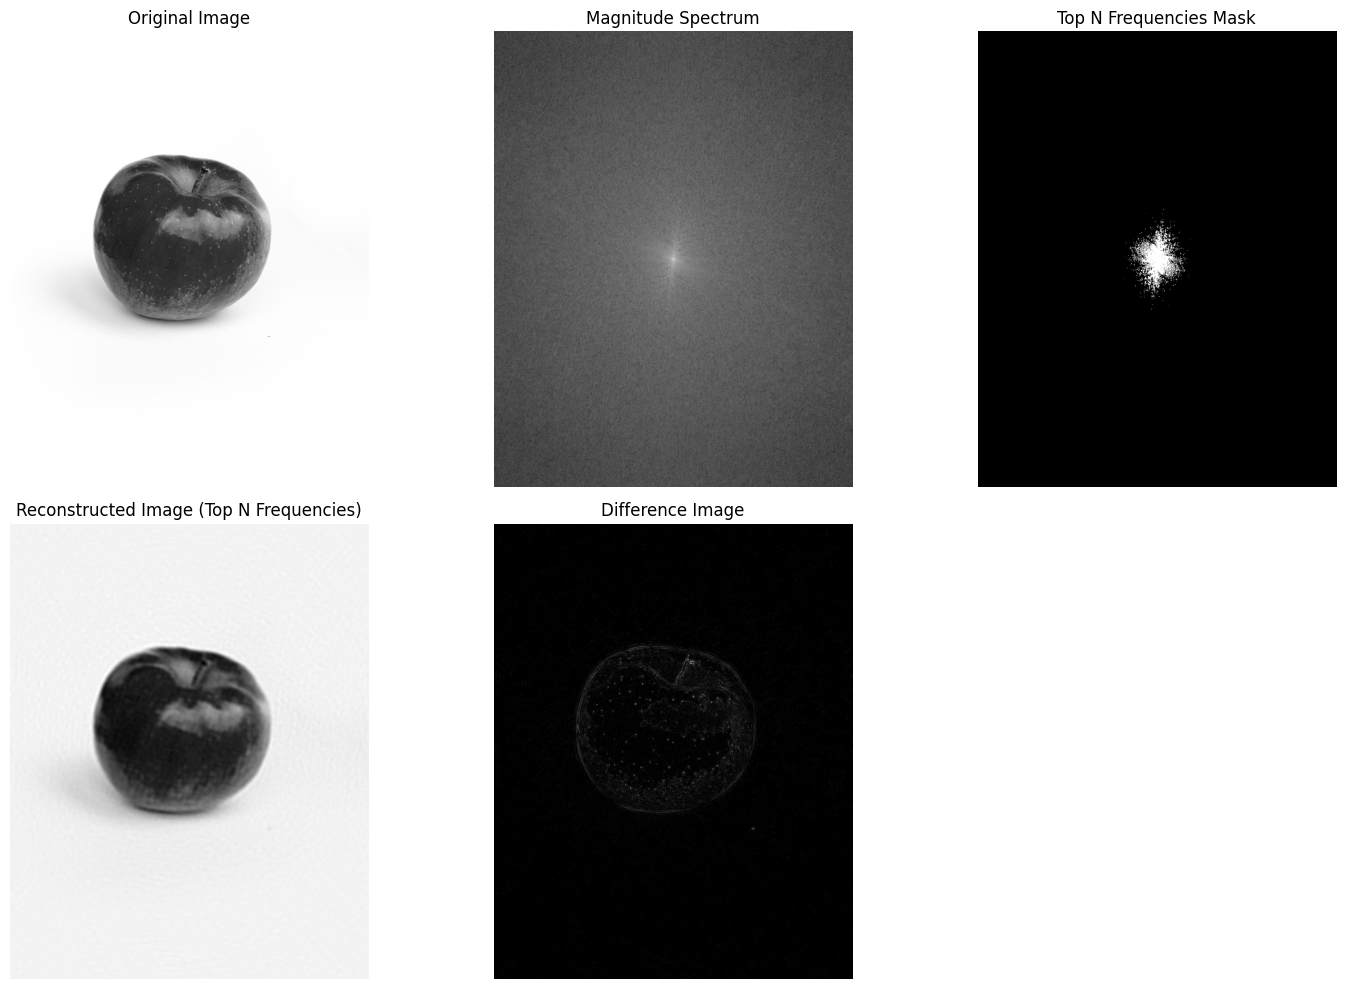

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('images/apple.jpg', cv2.IMREAD_GRAYSCALE)  # Replace 'image_path.jpg' with your image path

# Task 1: Identifying and Retaining Top N Frequencies
# Step 1: Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Shift zero frequency to the center
magnitude_spectrum = np.abs(fshift)

# Step 2: Identify top N frequencies
N = 10000
flat_indices = np.argsort(magnitude_spectrum.flatten())[::-1]  # Sort in descending order
top_indices = flat_indices[:N]

# Step 3: Create a mask to retain only the top N frequencies
mask = np.zeros_like(fshift, dtype=np.uint8)
rows, cols = magnitude_spectrum.shape
row_indices, col_indices = np.unravel_index(top_indices, (rows, cols))
mask[row_indices, col_indices] = 1

# Step 4: Apply the mask to the Fourier-transformed image
compressed_fshift = fshift * mask

# Task 2: Image Reconstruction and Compression Evaluation
# Step 1: Inverse Transform
compressed_fshift_ishift = np.fft.ifftshift(compressed_fshift)
reconstructed_image = np.fft.ifft2(compressed_fshift_ishift)
reconstructed_image = np.abs(reconstructed_image)

# Step 2: Compression Ratio
# Original: 1 frequency per pixel (total rows x cols frequencies)
# Compressed: Retaining only N frequencies
compression_ratio = (rows * cols) / N

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Fourier magnitude spectrum
plt.subplot(2, 3, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

# Mask for top N frequencies
plt.subplot(2, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title("Top N Frequencies Mask")
plt.axis('off')

# Reconstructed image
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (Top N Frequencies)")
plt.axis('off')

# Differences between original and reconstructed
difference_image = np.abs(image - reconstructed_image).astype(np.uint8)
plt.subplot(2, 3, 5)
plt.imshow(difference_image, cmap='gray')
plt.title("Difference Image")
plt.axis('off')

# Compression ratio
print(f"Compression Ratio: {compression_ratio:.2f}")

plt.tight_layout()
plt.show()


> ### Assignment 4: Image Compression Coding and Decoding
>
> #### Task 1: Compression Function
>
> - **Function**: `compress_image(image, p)`
>   - **Inputs**:
>     - `image`: The input grayscale image.
>     - `p`: The percentage of the top frequencies to retain.
>   - **Process**:
>     1. Convert the image to the frequency domain using the Fourier Transform.
>     2. Identify and retain only the top `p%` of frequencies based on their magnitudes.
>     3. Encode the Fourier Transform as a list of tuples `(x, y, FT coefficient)` for each **non-zero** coefficient, where `x` and `y` are the coordinates in the frequency domain.
>   - **Output**: The coded representation of the image based on non-zero Fourier coefficients.
>
> #### Task 2: Reconstruction Function
>
> - **Function**: `reconstruct_image(coded_representation, image_shape)`
>   - **Inputs**:
>     - `coded_representation`: The list of non-zero Fourier coefficients and their positions obtained from the compression function.
>     - `image_shape`: The shape of the original image to guide the reconstruction.
>   - **Process**:
>     1. Recreate the frequency domain representation of the image based on the coded representation.
>     3. Apply an inverse Fourier Transform to convert the frequency domain representation back to the spatial domain, reconstructing the image.
>   - **Output**: The reconstructed image from the coded frequency representation.
>
> #### Task 3: Analysis and Comparison
>
>   1. Apply the `compress_image` function to a test image at 1%, 10%, and 100% frequency retention levels to obtain different compressed representations.
>   2. Use the `reconstruct_image` function to reconstruct images from these compressed representations.
>   3. Compare the sizes of the coded representations at each level and calculate the compression ratios. Calculate a compression ratio as the ratio of the original image size to the coded representation size for each level.
>   4. Analyze and discuss the visual quality of the reconstructed images in comparison to the original.

Compression Level p=1%:
- Coded representation size: 41.91 KB
- Compression ratio: 3.13
------------------------------
Compression Level p=10%:
- Coded representation size: 419.19 KB
- Compression ratio: 0.31
------------------------------
Compression Level p=100%:
- Coded representation size: 4192.00 KB
- Compression ratio: 0.03
------------------------------


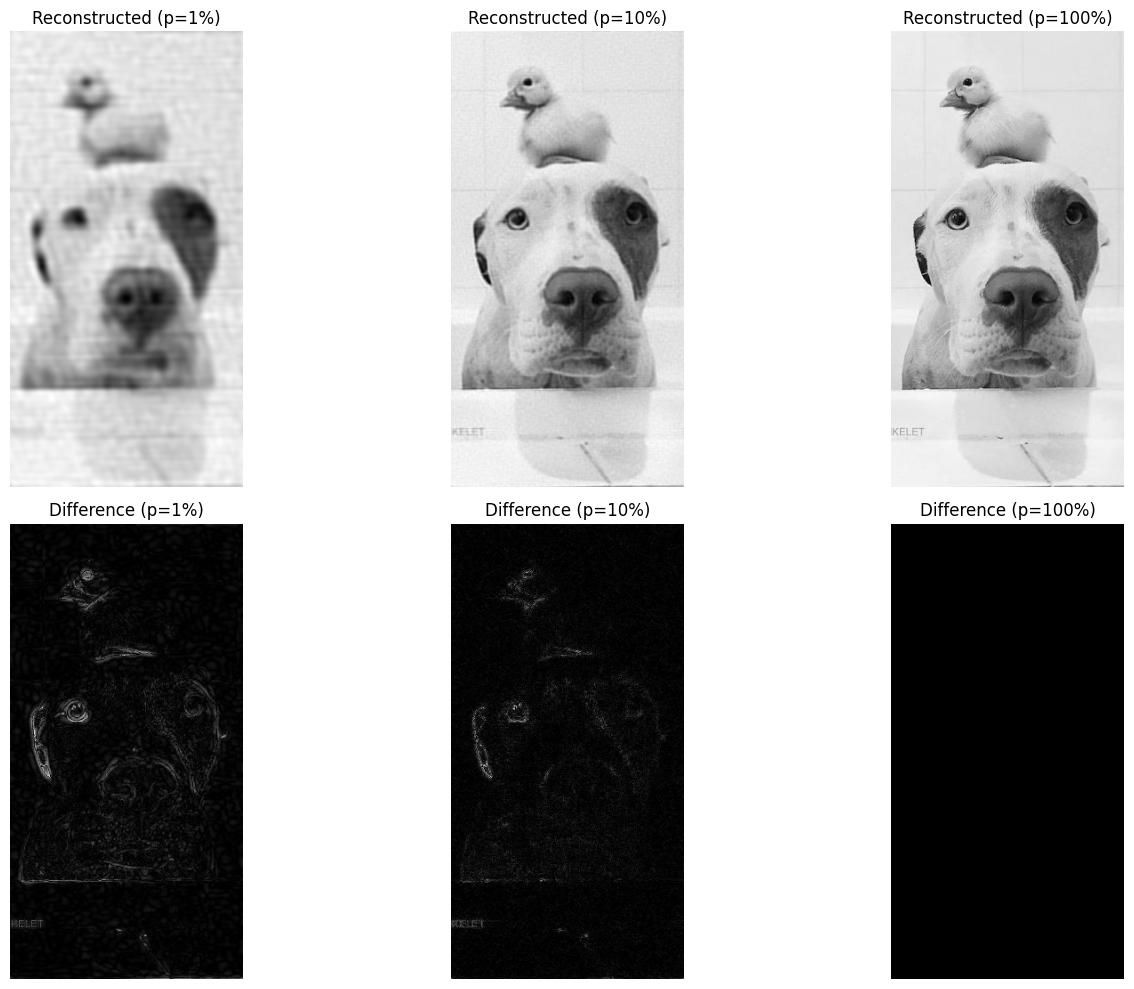

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Compression Function
def compress_image(image, p):
    """
    Compress the image by retaining the top p% of Fourier coefficients.

    Args:
        image (numpy.ndarray): Grayscale input image.
        p (float): Percentage of top frequencies to retain.

    Returns:
        list: Coded representation as a list of (x, y, FT coefficient).
    """
    # Perform Fourier Transform and shift the zero frequency to the center
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)

    # Sort the magnitude spectrum and identify top p% coefficients
    flat_indices = np.argsort(magnitude.flatten())[::-1]
    num_coefficients = int(p / 100 * len(flat_indices))
    top_indices = flat_indices[:num_coefficients]

    # Create coded representation
    coded_representation = []
    rows, cols = image.shape
    row_indices, col_indices = np.unravel_index(top_indices, (rows, cols))
    for x, y in zip(row_indices, col_indices):
        coded_representation.append((x, y, fshift[x, y]))

    return coded_representation

# Task 2: Reconstruction Function
def reconstruct_image(coded_representation, image_shape):
    """
    Reconstruct the image from coded representation.

    Args:
        coded_representation (list): Coded representation from compress_image().
        image_shape (tuple): Shape of the original image.

    Returns:
        numpy.ndarray: Reconstructed image.
    """
    # Initialize frequency domain representation
    fshift_reconstructed = np.zeros(image_shape, dtype=complex)

    # Populate frequency domain using coded representation
    for x, y, coeff in coded_representation:
        fshift_reconstructed[x, y] = coeff

    # Inverse Fourier Transform to spatial domain
    f_ishift = np.fft.ifftshift(fshift_reconstructed)
    reconstructed_image = np.fft.ifft2(f_ishift)
    reconstructed_image = np.abs(reconstructed_image)

    return reconstructed_image

# Task 3: Analysis and Comparison
def analyze_compression(image_path, levels):
    """
    Analyze compression at different levels and compare results.

    Args:
        image_path (str): Path to the input grayscale image.
        levels (list): List of percentage levels for compression.
    """
    # Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded correctly
    if image is None:
        print(f"Error: Could not load image from path: {image_path}")
        return

    # Original size in bytes
    original_size = image.size * image.itemsize

    # Initialize figure for visualization
    plt.figure(figsize=(15, 10))

    for i, p in enumerate(levels):
        # Compress and reconstruct the image
        coded_representation = compress_image(image, p)
        reconstructed_image = reconstruct_image(coded_representation, image.shape)

        # Calculate compressed size
        compressed_size = len(coded_representation) * (8 + 8 + 16)  # (x, y, real+imaginary coefficients)

        # Compression ratio
        compression_ratio = original_size / compressed_size

        # Plot reconstructed image
        plt.subplot(2, len(levels), i + 1)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title(f"Reconstructed (p={p}%)")
        plt.axis('off')

        # Plot difference image
        difference_image = np.abs(image - reconstructed_image).astype(np.uint8)
        plt.subplot(2, len(levels), len(levels) + i + 1)
        plt.imshow(difference_image, cmap='gray')
        plt.title(f"Difference (p={p}%)")
        plt.axis('off')

        # Print compression stats
        print(f"Compression Level p={p}%:")
        print(f"- Coded representation size: {compressed_size / 1024:.2f} KB")
        print(f"- Compression ratio: {compression_ratio:.2f}")
        print("-" * 30)

    plt.tight_layout()
    plt.show()

# Example Usage
image_path = 'images/ducks.jpg'  # Replace with the path to your image
analyze_compression(image_path, [1, 10, 100])

